In [1]:
import nbsetup
import numpy as np
import ergodicpy as ep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Complexity of Continuous systems


## Strategies

Here take a different perspective from 2.a. Looking at distributions for various levels of observations, plotting for different bins.

What we see is the same pattern of behaviour, where low bin levels push toward the extremes i.e. low bins give lower complexities for lower complex systems and vice versa.

But what we also find is the minimum complexity of a system is low for low complex systems, but converges to the upper bound of high complex systems. Therefore has the most sensitive spread.

## Thresholds

We then try to set a threshold for is complex. We find that 0.07 is a reasonable static value. However, like many thresholds, we find the more observations we have the lower the threshold should be. A strategy for this would ideally be found analytically, but we explore emperical options here.

In [37]:
def analyse(o_range, trials=10, b_max=10, func=lambda o,x: np.random.random(o), threshold=ep.THRESHOLD, ensembles=None):
    data = []
    fixed = []
    ecs = {}
    for o in o_range:
        nbsetup.cp(o)
        ecs[o] = []
        for t in range(trials):
            x = np.random.random(o)
            y = func(o, x)
            ec = ep.ErgodicCorrelation(x, y, lazy=True, ensembles=ensembles, threshold=threshold)
            ecs[o].append(ec)
            
            
            for b in ep.binint(3, int(o/b_max)):
                ec.update_bins(b)
                ms = ec.correlations.copy()
                ms['o'] = o
                ms['t'] = t
                ms['bins'] = b
                ms['e'] = ec.ensemble_count
                data.append(ms)

            # maxx is the final
            fixed.append(ms)
    
    df = pd.DataFrame(data=data)
    
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
    pal = 'Spectral'
    key = 'complexity'

    # scatter
    g = sns.scatterplot(data=df, x='o', y=key, hue='bins', ax=axes[0],  palette=pal)
    g.set(ylabel='Ergodic complexity', xlabel='Observations count', ylim=(0,None), title='Raw values')
        
    # strategies
    mdf = df.groupby(['o','t'], as_index=False)
    sns.lineplot(data=pd.DataFrame(data=fixed).groupby('o', as_index=False).mean(), x='o', y=key, ax=axes[1], label='max(bins)')
    g = sns.lineplot(data=mdf.min().groupby('o', as_index=False).mean(), x='o', y=key, ax=axes[1], label='min(complexity)')
    g = sns.lineplot(data=mdf.max().groupby('o', as_index=False).mean(), x='o', y=key, ax=axes[1], label='max(complexity)')
    g = sns.lineplot(data=mdf.mean().groupby('o', as_index=False).mean(), x='o', y=key, ax=axes[1], label='mean(complexity)')
    
    # axis stuff
    g.set(ylim=(0,None), title='Strategies', ylabel=None, xlabel='Observations count')
    axes[1].axhline(y=threshold, color='grey', linestyle='dotted')
    
    return df, ecs, fig

# Testing low vs high for up to 200 observations

200


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


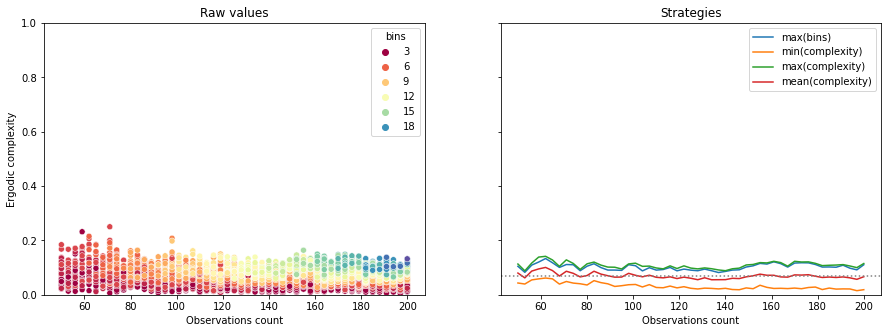

In [38]:
# this is a random x random distribution

b = analyse(ep.binint(50,200,50))
b[2].savefig('figures/low-complexity.eps')

200


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


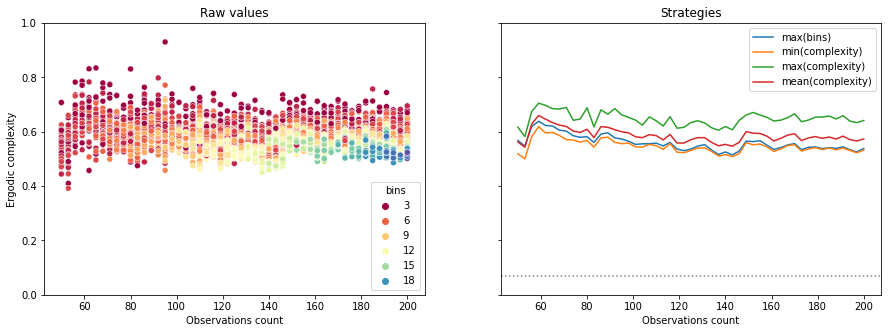

In [39]:
# this is a linear line with 0.1 noise

b = analyse(ep.binint(50,200,50), func=lambda o,x: x+np.random.normal(0,0.1,o))
b[2].savefig('figures/high-complexity.eps')

# Testing for larger numbers of observations (up to 2000)

2000


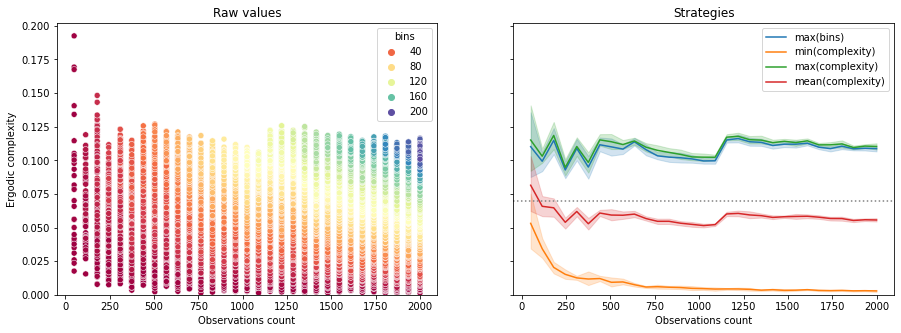

In [10]:
b = analyse(ep.binint(50,2000,30))

2000


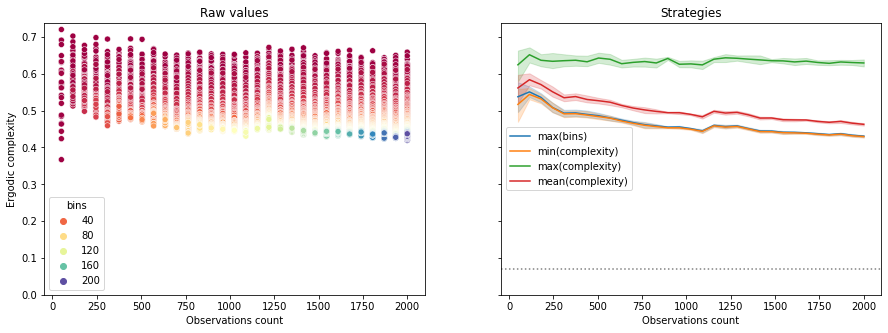

In [11]:
b = analyse(ep.binint(50,2000,30), func=lambda o,x: x+np.random.normal(0,0.1,o))

# Testing for more noise

200


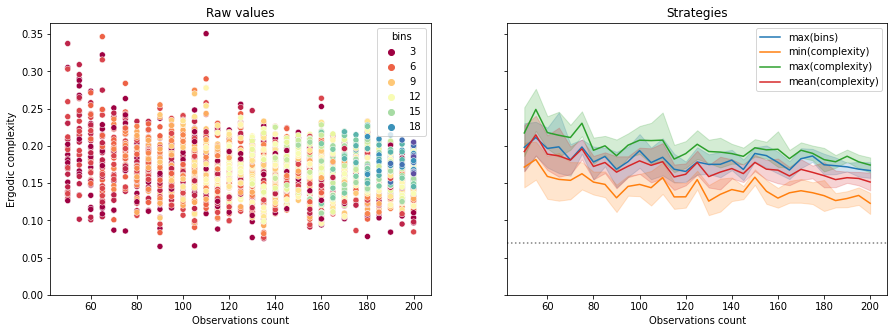

In [8]:
b = analyse(ep.binint(50,200,30), func=lambda o,x: x+np.random.normal(0,0.5,o))

200


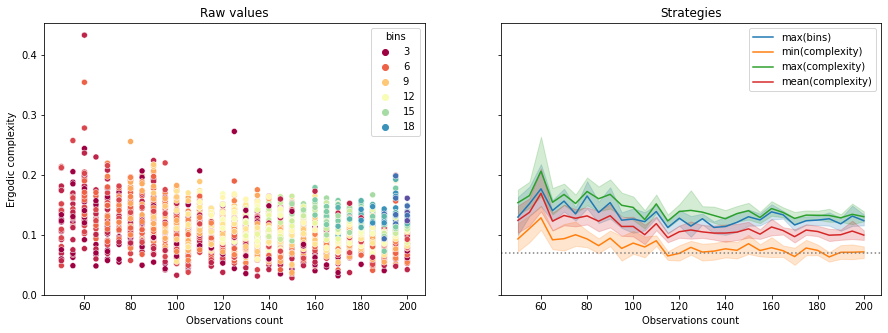

In [9]:
b = analyse(ep.binint(50,200,30), func=lambda o,x: x+np.random.normal(0,1.2,o))

# Dynamic thresholds

5000


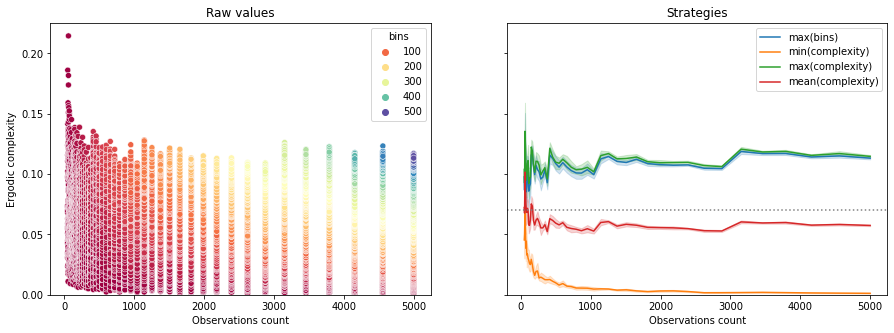

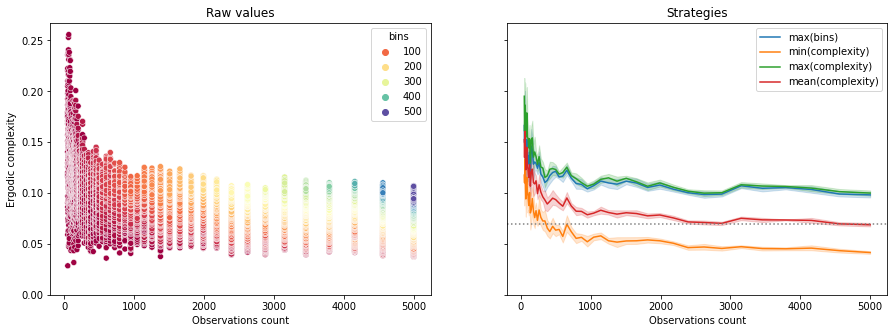

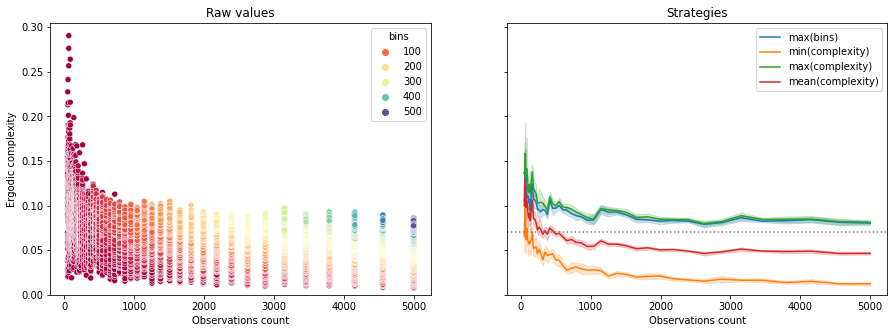

In [21]:
obs = ep.binint(50, 5000, 50, log=True)
a3 = analyse(obs, b_max=10)
b3 = analyse(obs, b_max=10, func=lambda o,x: x+np.random.normal(0,0.8,o))
c3 = analyse(obs, b_max=10, func=lambda o,x: np.ones(o)+np.random.normal(0,0.1,o))

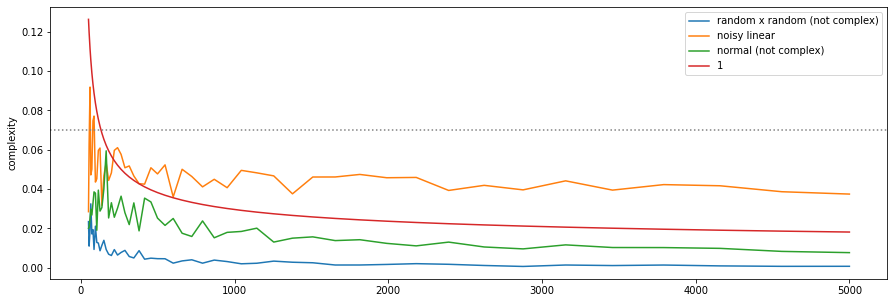

In [22]:
def get_stabilize(df):
    return df.groupby(['o'], as_index=False).min()

fig, axes = plt.subplots(1, 1, figsize=(15,5))
sns.lineplot(x=obs, y=get_stabilize(a3[0])['complexity'], label='random x random (not complex)', ax=axes)
sns.lineplot(x=obs, y=get_stabilize(b3[0])['complexity'], label='noisy linear', ax=axes)
sns.lineplot(x=obs, y=get_stabilize(c3[0])['complexity'], label='normal (not complex)', ax=axes)

sns.lineplot(x=obs, y=(1/np.log((obs)/3)**2), label='1', ax=axes)
axes.axhline(y=0.07, color='grey', linestyle='dotted')